In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('Titanic.csv',usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.shape

(891, 3)

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(714, 3)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
x= df.iloc[:,1:]
y= df.iloc[:,0]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [10]:
X_train.head

<bound method NDFrame.head of       Age     Fare
830  15.0  14.4542
565  24.0  24.1500
148  36.5  26.0000
105  28.0   7.8958
289  22.0   7.7500
..    ...      ...
179  36.0   0.0000
808  39.0  13.0000
93   26.0  20.5750
291  19.0  91.0792
51   21.0   7.8000

[571 rows x 2 columns]>

In [11]:
clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)
ypred = clf.predict(X_test)

In [13]:
accuracy_score(ypred,y_test)

0.6643356643356644

In [14]:
np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy'))

0.6345070422535211

In [110]:
kbin_age = KBinsDiscretizer(n_bins=50, encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=50, encode='ordinal',strategy='quantile')

In [111]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [112]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

/Users/tajbirhasanshuvo/micromamba/envs/tf-m1/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/tajbirhasanshuvo/micromamba/envs/tf-m1/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


In [113]:
trf.named_transformers_['first'].n_bins_

array([42])

In [114]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  2.  ,  4.  ,  6.2 ,  9.  , 14.  , 16.  , 17.  , 18.  ,
              19.  , 20.  , 21.  , 22.  , 23.  , 24.  , 25.  , 26.  , 27.  ,
              28.  , 29.  , 30.  , 31.  , 32.  , 32.2 , 34.  , 34.6 , 35.  ,
              36.  , 36.2 , 38.  , 39.  , 40.  , 42.  , 43.  , 44.8 , 46.2 ,
              48.  , 50.  , 51.  , 54.  , 58.2 , 63.6 , 80.  ])             ],
      dtype=object)

In [115]:
output = pd.DataFrame({
    'age': X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare': X_train['Fare'],
    'fare_trf':X_train_trf[:,1],
})

In [116]:
output['age_labels'] = pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [117]:
output.sample(
    5
)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
369,24.0,14.0,69.3000,37.0,"(23.0, 24.0]","(56.986, 69.3]"
70,32.0,22.0,10.5000,15.0,"(31.0, 32.0]","(9.588, 10.5]"
393,23.0,13.0,113.2750,41.0,"(22.0, 23.0]","(108.9, 134.727]"
588,22.0,12.0,8.0500,11.0,"(21.0, 22.0]","(7.925, 8.05]"
321,27.0,17.0,7.8958,9.0,"(26.0, 27.0]","(7.854, 7.896]"


In [118]:
clf1 = DecisionTreeClassifier()

clf1.fit(X_train_trf,y_train)
ypred1 = clf.predict(X_test_trf)

/Users/tajbirhasanshuvo/micromamba/envs/tf-m1/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [119]:
accuracy_score(ypred1,y_test)

0.6293706293706294

In [121]:
x_trf= trf.fit_transform(x)
np.mean(cross_val_score(clf1,x_trf,y,cv=10,scoring='accuracy'))

/Users/tajbirhasanshuvo/micromamba/envs/tf-m1/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/Users/tajbirhasanshuvo/micromamba/envs/tf-m1/lib/python3.10/site-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


0.627445226917058

In [129]:
def discritize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins, encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins, encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
    ])
    
    x_trf= trf.fit_transform(x)
    print(np.mean(cross_val_score(clf1,x_trf,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title('After')

    plt.show()
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title('Before')

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title('After')

    plt.show()

0.682140062597809


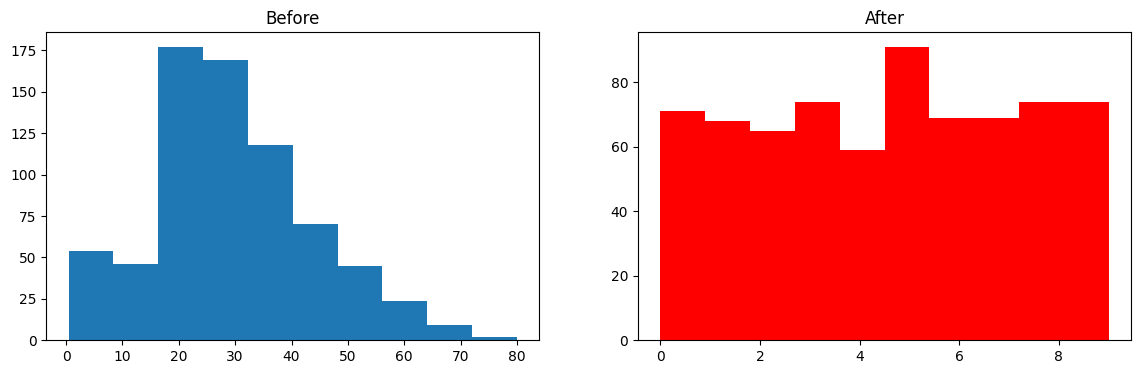

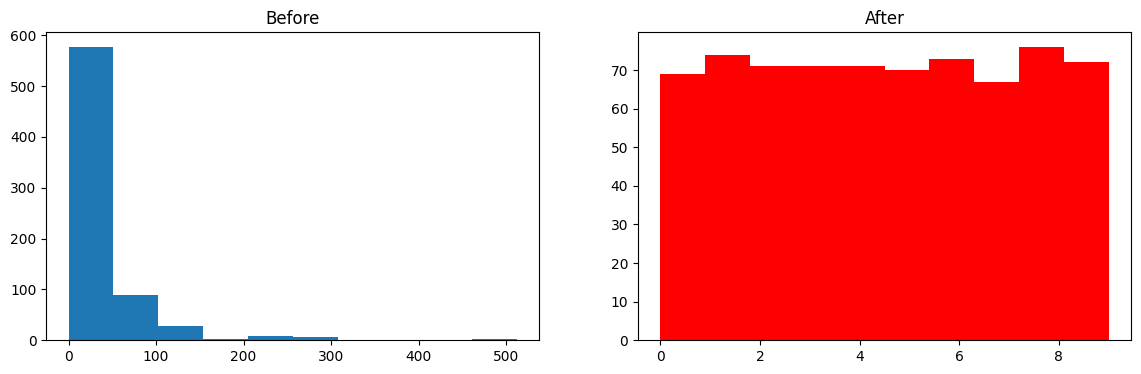

In [134]:
discritize(10,'quantile')